In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./online_shoppers_intention.csv')
df_copy = df.copy()
df_copy.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

## Data Cleaning

False    10422
True      1908
Name: Revenue, dtype: int64


<Axes: xlabel='Revenue', ylabel='count'>

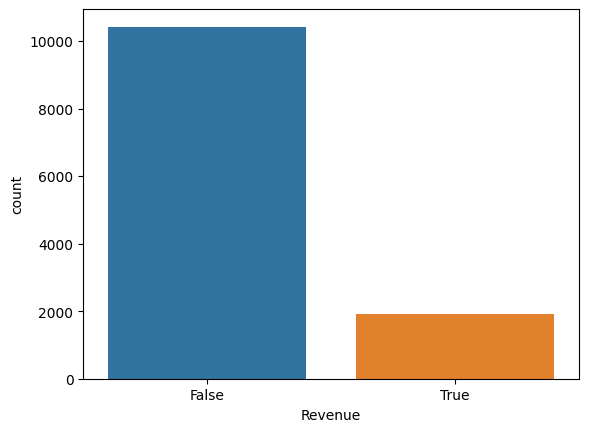

In [4]:
print(df_copy['Revenue'].value_counts())
sns.countplot(data=df_copy, x='Revenue')

In [5]:
df_copy.drop_duplicates(inplace=True)

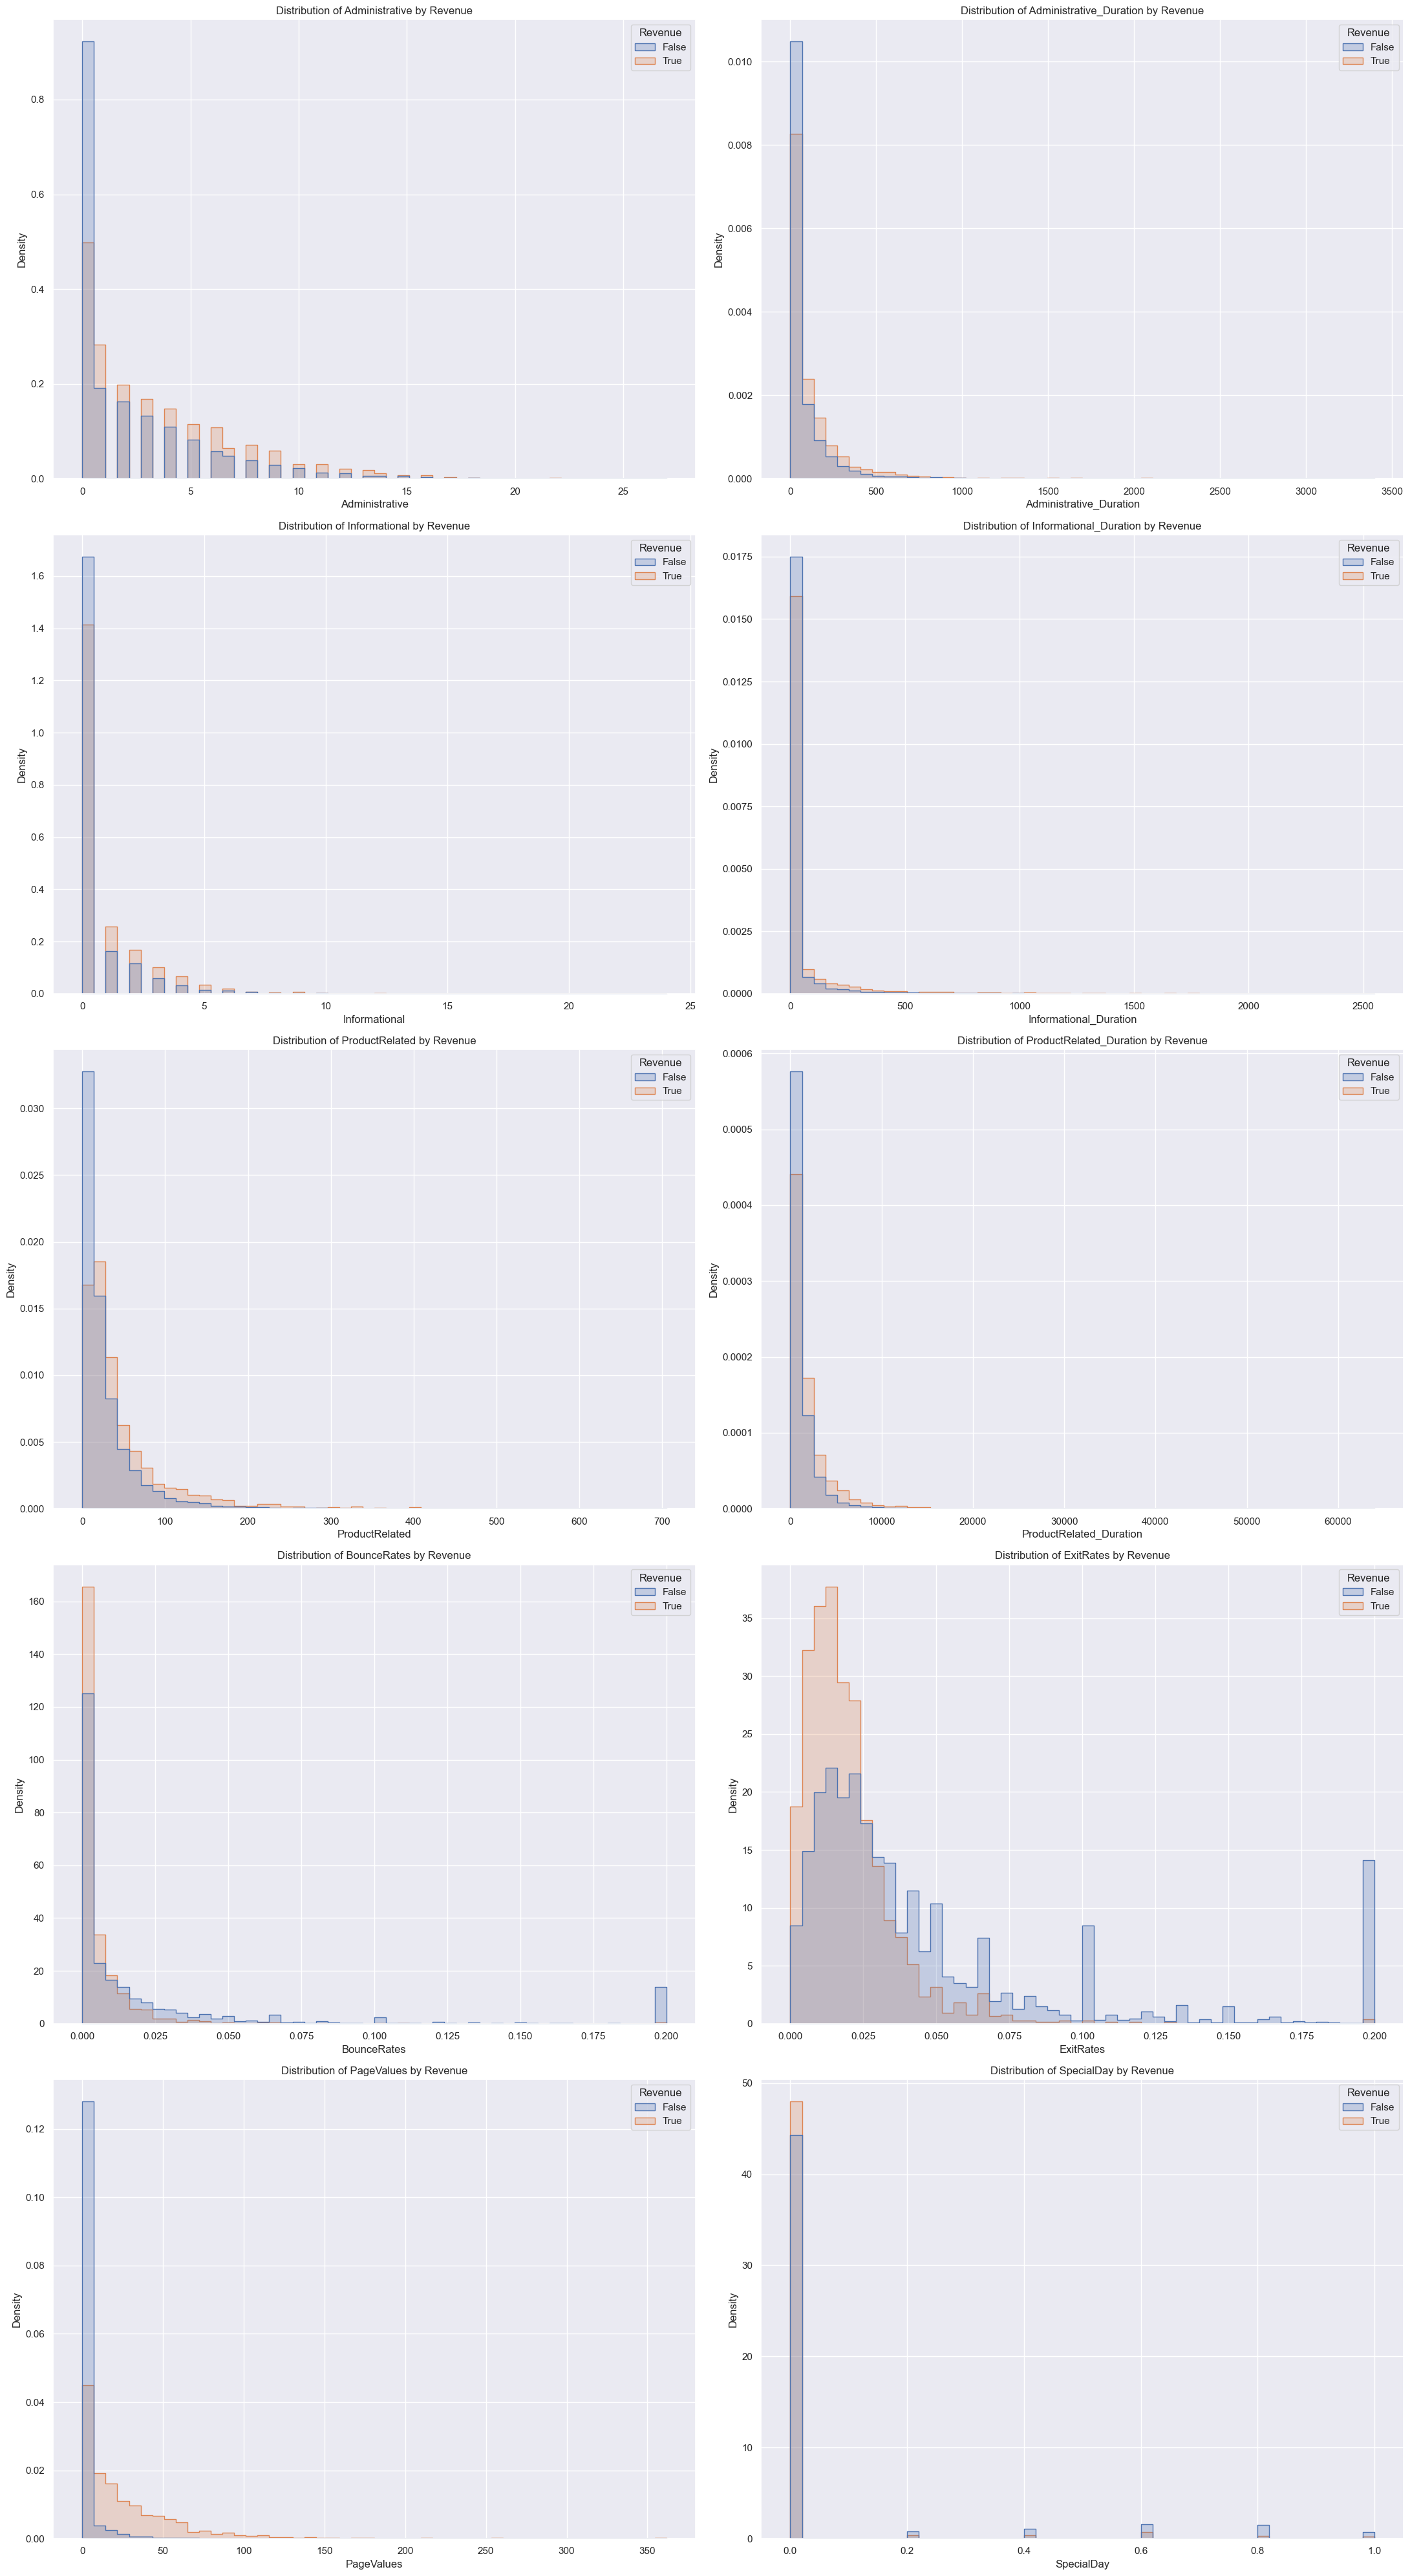

In [6]:
sns.set_theme()

fig, axes = plt.subplots(5, 2, figsize=(22, 40))


for col, ax in zip(df_copy.select_dtypes(include='number').columns, axes.flatten()):
    sns.histplot(data=df_copy, x=col, hue="Revenue", element="step", stat="density", common_norm=False, bins=50, ax=ax)
    ax.set_title(f'Distribution of {col} by Revenue')

plt.tight_layout()
plt.show()

In [7]:
df_copy.apply(lambda i : sum(i.isnull()), axis=0)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

C:\Users\ACER\AppData\Local\Temp\ipykernel_6408\3521932539.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_copy.corr()


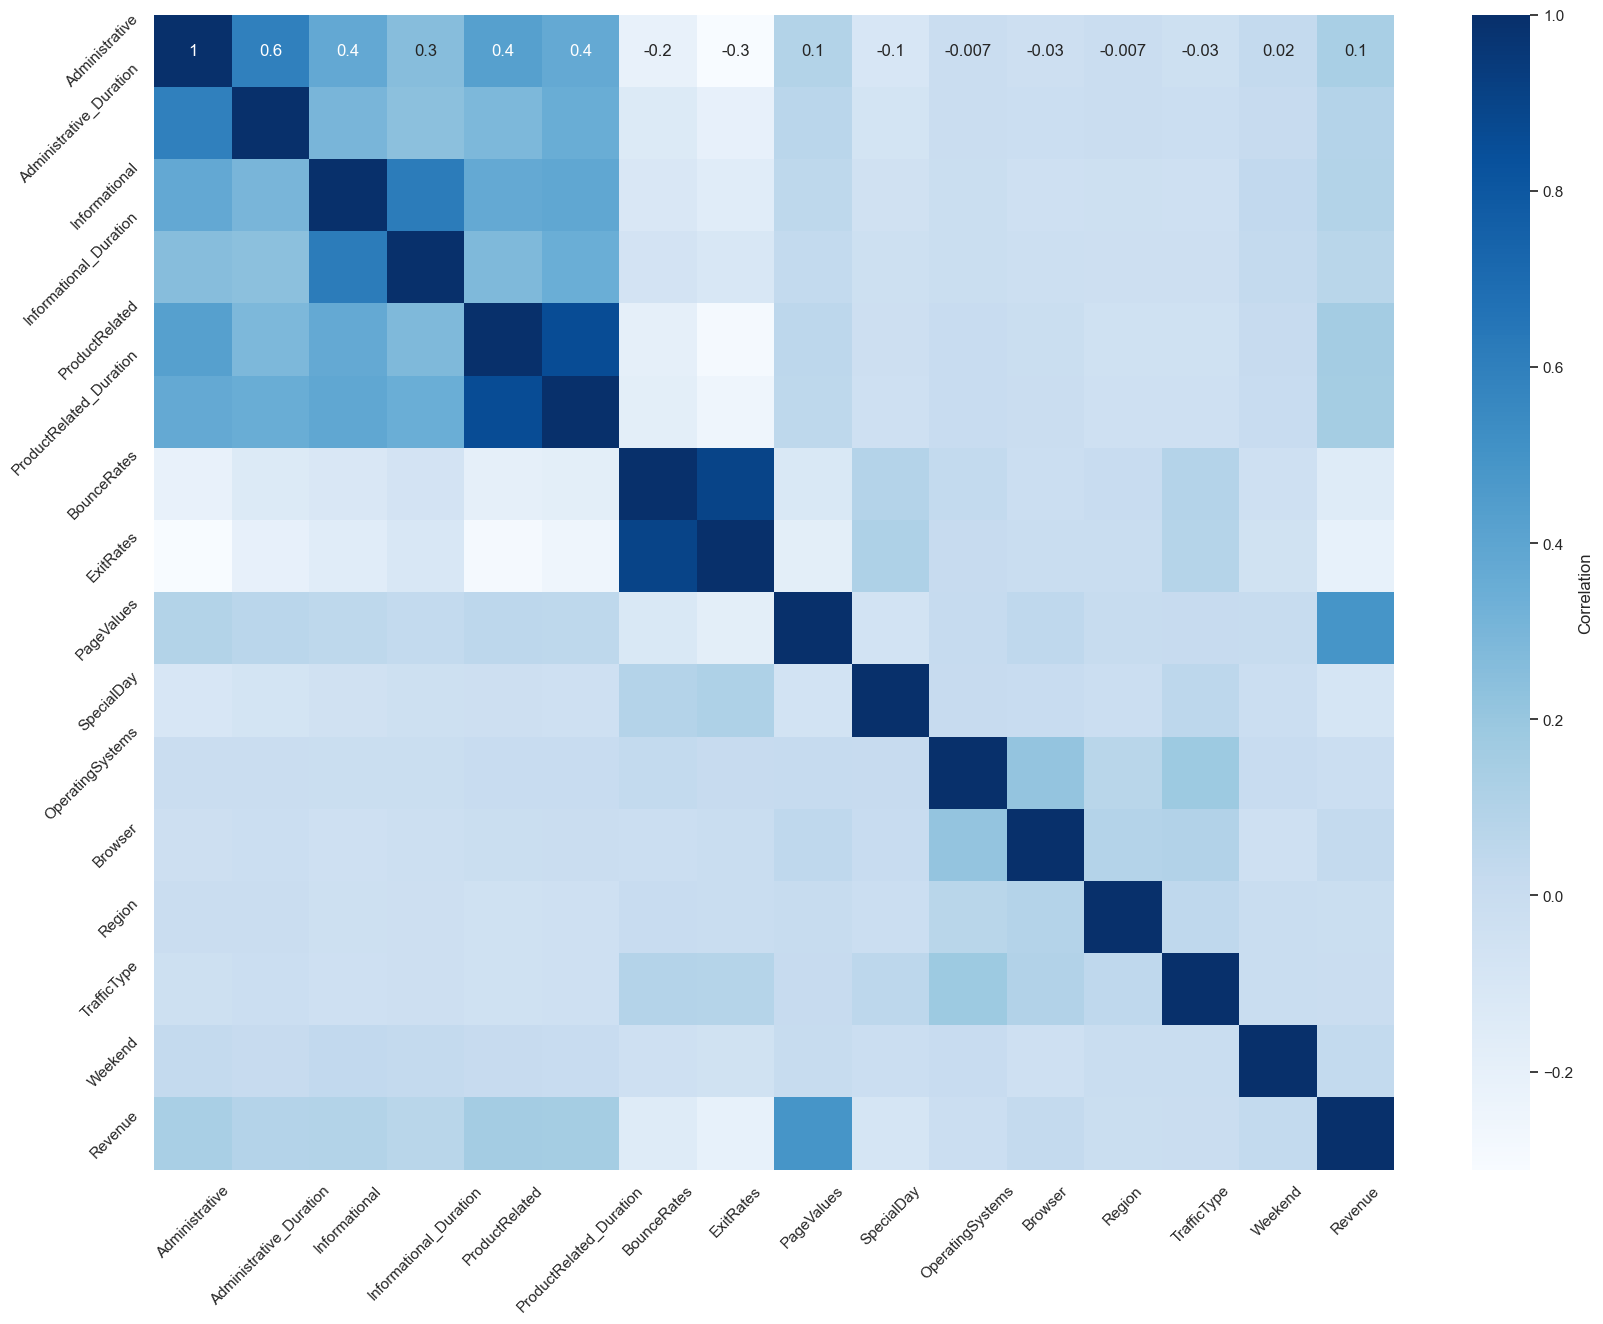

In [8]:
plt.figure(figsize=(20, 15))  
corr = df_copy.corr()
sns.heatmap(corr, annot=True, fmt='.1g', cmap='Blues',
            xticklabels=True, yticklabels=True,  
            cbar_kws={'label': 'Correlation'})  
plt.xticks(rotation=45)  
plt.yticks(rotation=45)  
plt.show()

## Handling Outliers

Text(0.5, 1.0, 'PageValues')

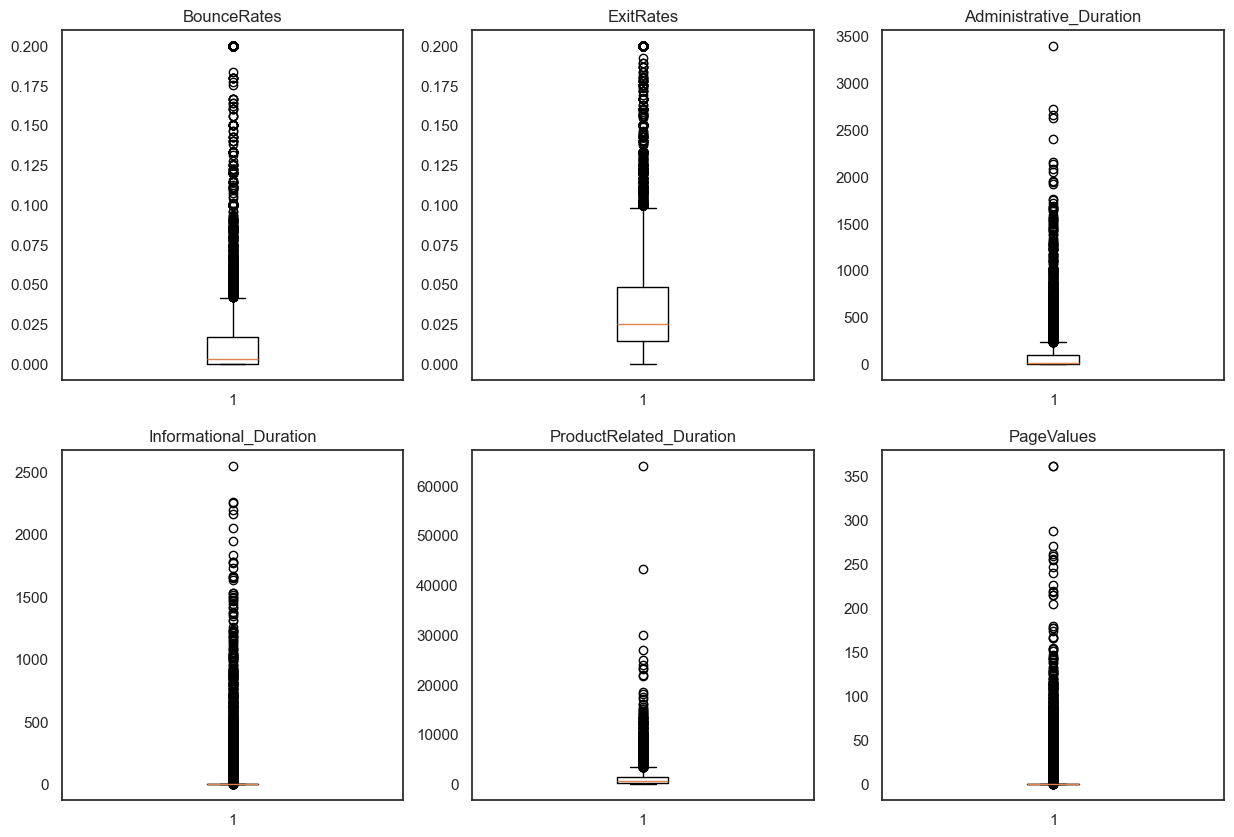

In [9]:
plt.figure(figsize = (15, 10))
sns.set_style('white')
ax=plt.subplot(231)
plt.boxplot(df_copy['BounceRates'])
ax.set_title('BounceRates')
ax=plt.subplot(232)
plt.boxplot(df_copy['ExitRates'])
ax.set_title('ExitRates')
ax=plt.subplot(233)
plt.boxplot(df_copy['Administrative_Duration'])
ax.set_title('Administrative_Duration')
ax=plt.subplot(234)
plt.boxplot(df_copy['Informational_Duration'])
ax.set_title('Informational_Duration')
ax=plt.subplot(235)
plt.boxplot(df_copy['ProductRelated_Duration'])
ax.set_title('ProductRelated_Duration')
ax=plt.subplot(236)
plt.boxplot(df_copy['PageValues'])
ax.set_title('PageValues')

In [11]:
# IQR method
features=['BounceRates','ExitRates','Administrative_Duration','ProductRelated_Duration']
for cols in features:
    Q1 = df_copy[cols].quantile(0.25)
    Q3 = df_copy[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (df_copy[cols] >= Q1 - 1.5 * IQR) & (df_copy[cols] <= Q3 + 1.5 *IQR)
    df_copy=df_copy.loc[filter]
df_copy

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
4,0,0.00,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.00,0,0.0,19,154.216667,0.015789,0.024561,0.000000,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
9,0,0.00,0,0.0,3,738.000000,0.000000,0.022222,0.000000,0.4,Feb,2,4,1,2,Returning_Visitor,False,False
11,0,0.00,0,0.0,16,407.750000,0.018750,0.025833,0.000000,0.4,Feb,1,1,4,3,Returning_Visitor,False,False
12,0,0.00,0,0.0,7,280.500000,0.000000,0.028571,0.000000,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12323,2,64.75,0,0.0,44,1157.976190,0.000000,0.013953,0.000000,0.0,Nov,2,2,1,10,Returning_Visitor,False,False
12324,0,0.00,1,0.0,16,503.000000,0.000000,0.037647,0.000000,0.0,Nov,2,2,1,1,Returning_Visitor,False,False
12325,3,145.00,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.00,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False


Text(0.5, 1.0, 'PageValues')

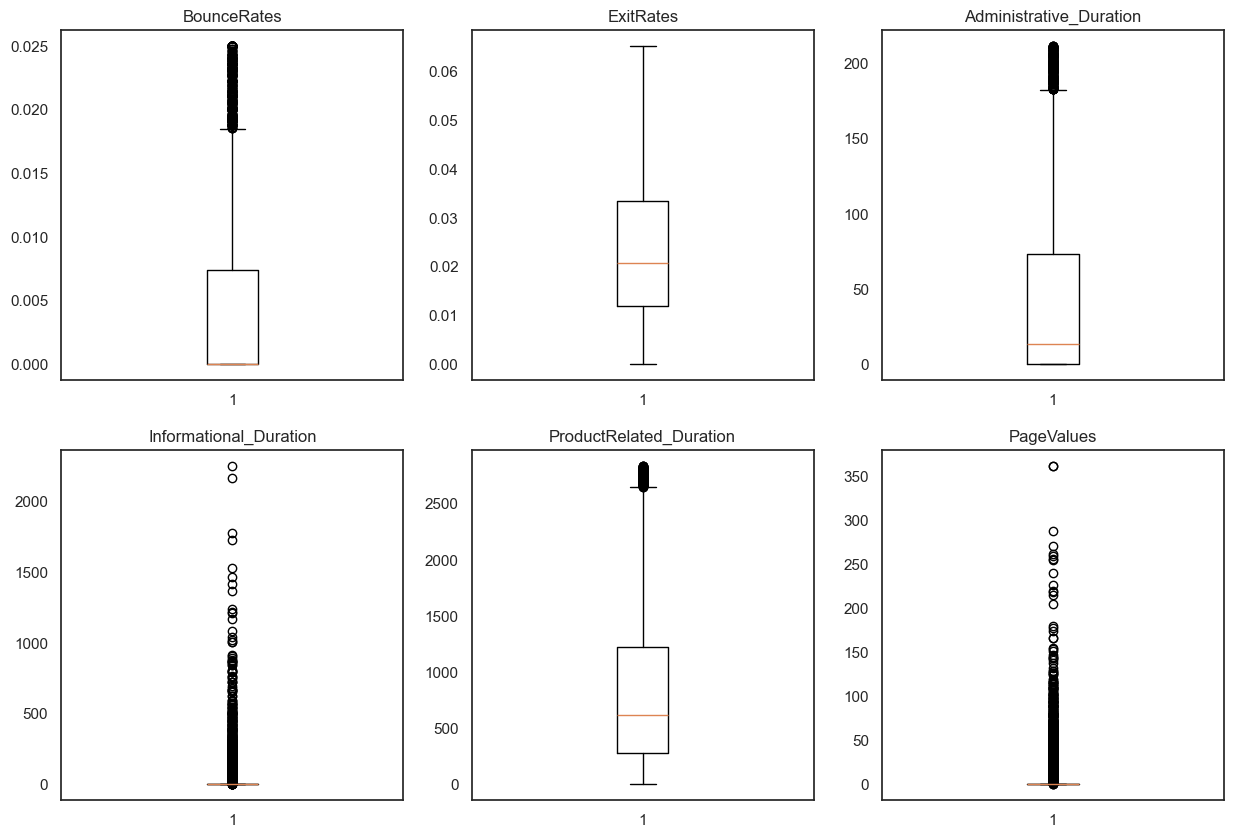

In [12]:
plt.figure(figsize = (15, 10))
sns.set_style('white')
ax=plt.subplot(231)
plt.boxplot(df_copy['BounceRates'])
ax.set_title('BounceRates')
ax=plt.subplot(232)
plt.boxplot(df_copy['ExitRates'])
ax.set_title('ExitRates')
ax=plt.subplot(233)
plt.boxplot(df_copy['Administrative_Duration'])
ax.set_title('Administrative_Duration')
ax=plt.subplot(234)
plt.boxplot(df_copy['Informational_Duration'])
ax.set_title('Informational_Duration')
ax=plt.subplot(235)
plt.boxplot(df_copy['ProductRelated_Duration'])
ax.set_title('ProductRelated_Duration')
ax=plt.subplot(236)
plt.boxplot(df_copy['PageValues'])
ax.set_title('PageValues')

In [13]:
df_copy['SpecialDay'].value_counts()

0.0    6692
0.6     184
0.8     154
0.4     121
0.2      94
1.0      76
Name: SpecialDay, dtype: int64

In [14]:
df_copy.loc[df_copy['SpecialDay'] >= 0.5, 'SpecialDay'] = 1
df_copy.loc[df_copy['SpecialDay'] < 0.5, 'SpecialDay'] = 0
df_copy['SpecialDay'].value_counts()

0.0    6907
1.0     414
Name: SpecialDay, dtype: int64

In [15]:
df_copy.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

## Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
df_copy['Revenue'] = Le.fit_transform(df_copy['Revenue'])
df_copy['Weekend'] = Le.fit_transform(df_copy['Weekend'])
df_copy['Month'] = Le.fit_transform(df_copy['Month'])
df_copy=df_copy.replace({'Returning_Visitor':0, 'New_Visitor':1, 'Other':2})
df_copy.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,2,3,3,1,4,0,1,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,2,2,2,1,3,0,0,0
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.0,2,2,4,1,2,0,0,0
11,0,0.0,0,0.0,16,407.750000,0.018750,0.025833,0.0,0.0,2,1,1,4,3,0,0,0
12,0,0.0,0,0.0,7,280.500000,0.000000,0.028571,0.0,0.0,2,1,1,1,3,0,0,0


## Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler

Categorical_variables=['Weekend','Revenue','Administrative','Informational','ProductRelated','SpecialDay',
                     'OperatingSystems','Browser','Region','Month','TrafficType','VisitorType']

feature_scale=[feature for feature in df_copy.columns if feature not in Categorical_variables]

scaler=StandardScaler()
scaler.fit(df_copy[feature_scale])

StandardScaler()

In [18]:
scaled_data = pd.concat([df_copy[['Weekend','Revenue','Administrative','Informational',
                                    'ProductRelated','SpecialDay','OperatingSystems',
                                    'Browser','Region','Month','TrafficType','VisitorType']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df_copy[feature_scale]), columns=feature_scale)],
                    axis=1)
scaled_data.head()

,Weekend,Revenue,Administrative,Informational,ProductRelated,SpecialDay,OperatingSystems,Browser,Region,Month,TrafficType,VisitorType,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,1,0,0,0,10,0.0,3,3,1,2,4,0,-0.764334,-0.227184,-0.288612,2.320730,1.894443,-0.337392
1,0,0,0,0,19,0.0,2,2,1,2,3,0,-0.764334,-0.227184,-0.972833,1.695934,0.102086,-0.337392
2,0,0,0,0,3,0.0,2,4,1,2,2,0,-0.764334,-0.227184,-0.128864,-0.647053,-0.062728,-0.337392
3,0,0,0,0,16,0.0,1,1,4,2,3,0,-0.764334,-0.227184,-0.606303,2.135244,0.191704,-0.337392
4,0,0,0,0,7,0.0,1,1,1,2,3,0,-0.764334,-0.227184,-0.790267,-0.647053,0.384625,-0.337392


## Feature Selection

In [19]:
from sklearn.ensemble import ExtraTreesClassifier

label_data = scaled_data.copy()
X=label_data.drop(['Revenue'],axis=1)
y=label_data.Revenue

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

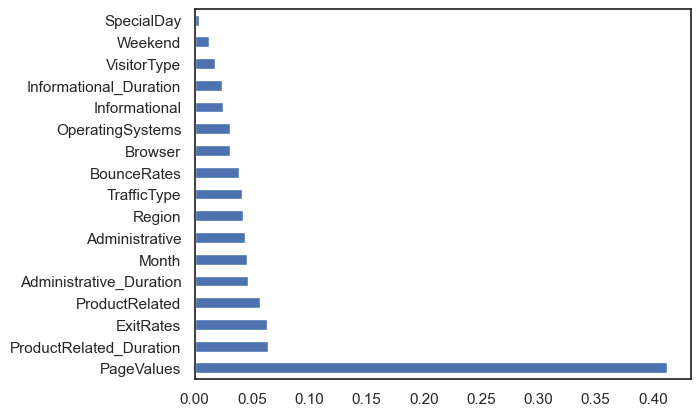

In [20]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

X = label_data.drop(['SpecialDay','Weekend','VisitorType','Revenue'], axis=1)
Y = label_data.Revenue

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)
print(X_train.shape)
print(X_test.shape)

(5490, 14)
(1831, 14)


In [22]:
from sklearn.linear_model import LogisticRegression

regr = LogisticRegression(random_state=0)
regr.fit(X_train, y_train)

D:\HAUI\ML\BTL\venv_ml\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1492
           1       0.84      0.47      0.60       339

    accuracy                           0.89      1831
   macro avg       0.87      0.72      0.77      1831
weighted avg       0.88      0.89      0.87      1831



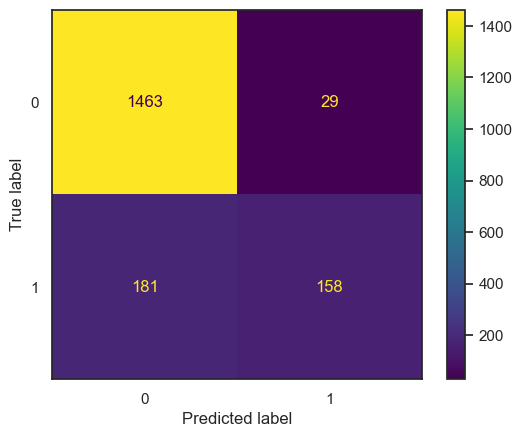

In [53]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

y_pred = regr.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(regr, X_test, y_test)

## Using BalanceBaggingClassifier

In [26]:
from imblearn.ensemble import BalancedBaggingClassifier

balanced_bagging_classifier = BalancedBaggingClassifier(regr,
                                                        sampling_strategy='auto', 
                                                        replacement=False, 
                                                        random_state=42)

In [41]:
balanced_bagging_classifier.fit(X_train, y_train)
 
y_pred = balanced_bagging_classifier.predict_proba(X_test)[:,1] >= 0.55

D:\HAUI\ML\BTL\venv_ml\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\HAUI\ML\BTL\venv_ml\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1492
           1       0.72      0.73      0.73       339

    accuracy                           0.90      1831
   macro avg       0.83      0.83      0.83      1831
weighted avg       0.90      0.90      0.90      1831



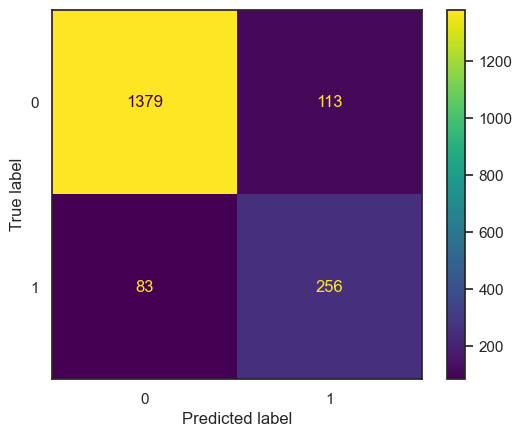

In [42]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(balanced_bagging_classifier, X_test, y_test)

## Using SMOTE

In [31]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Class distribution before SMOTE:", Counter(y_train))
 
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
 
print("Class distribution after SMOTE:", Counter(y_train_resampled))

Class distribution before SMOTE: Counter({0: 4572, 1: 918})
Class distribution after SMOTE: Counter({0: 4572, 1: 4572})


In [32]:
regr2 = grid_search.best_estimator_
regr2.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=0.1, solver='liblinear')

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1492
           1       0.71      0.73      0.72       339

    accuracy                           0.90      1831
   macro avg       0.83      0.83      0.83      1831
weighted avg       0.90      0.90      0.90      1831



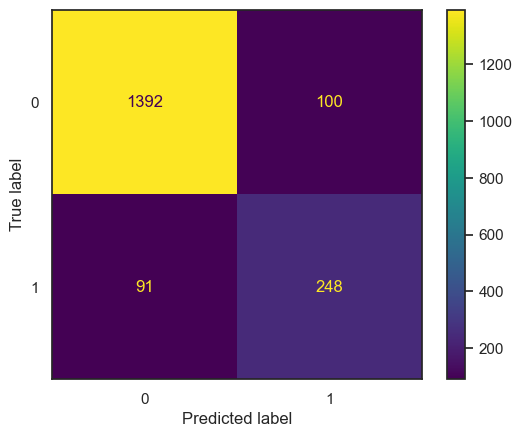

In [33]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

y_pred = regr2.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(regr2, X_test, y_test)

## AUC-ROC Curve

D:\HAUI\ML\BTL\venv_ml\lib\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


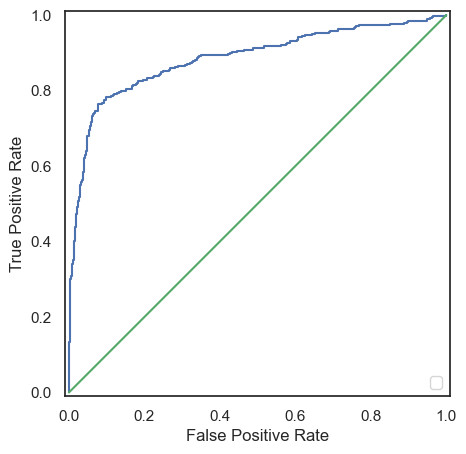

In [55]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

y_proba = regr.predict_proba(X_test)
def plot_auc_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')

plot_auc_roc_curve(y_test, y_proba[:, 1])

## Precision-Recall Curve (PR curve)

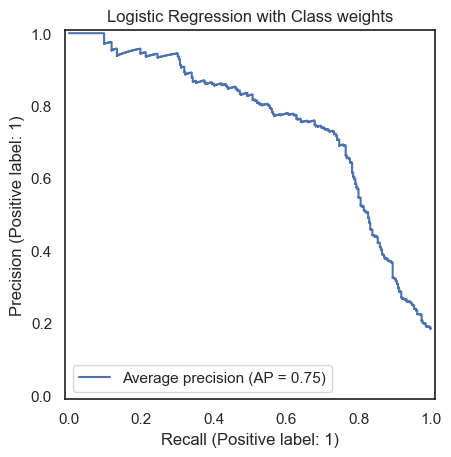

In [56]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    regr, X_test, y_test, name="Average precision")
_ = display.ax_.set_title("Logistic Regression with Class weights")